In [21]:
import pyspark 
import yfinance as yf
from pyspark.sql.functions import mean, stddev, corr

In [31]:
ticker = "AAPL" 
start_date = "2010-01-01"
end_date = "2023-07-04"

stock_prices_data = yf.download(ticker, start=start_date, end=end_date)

#Save file
stock_prices_data.to_csv("Data/stock_prices_data.csv")

[*********************100%***********************]  1 of 1 completed


In [24]:
stock_prices_data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434674,447610800


In [33]:
stock_prices_df = spark.read\
                .option("header", "true")\
                .option("inferSchema", "true")\
                .csv("Data/stock_prices_data.csv")

In [34]:
#Calculate mean, standard deviation, and correlation
mean_price = stock_prices_df.select(mean("Close")).first()[0]
stddev_price = stock_prices_df.select(stddev("Close")).first()[0]
corr_price_volume = stock_prices_df.select(corr("Close", "Volume")).first()[0]

print("Mean Price:", mean_price)
print("Standard Deviation Price:", stddev_price)
print("Correlation between Price and Volume:", corr_price_volume)

Mean Price: 55.36269333041834
Standard Deviation Price: 50.966907859254476
Correlation between Price and Volume: -0.5163501729502936


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

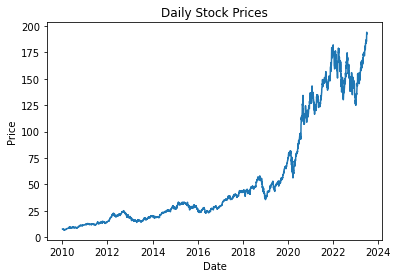

In [35]:
#daily closing prices over the years
prices = stock_prices_df.select("Date", "Close").collect()
dates = [row.Date for row in prices]
prices = [row.Close for row in prices]

plt.plot(dates, prices)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Daily Stock Prices")
plt.show()
